In [1]:
from geopy.geocoders import Nominatim
from osgeo import gdal, osr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
geolocator = Nominatim(user_agent="Test")

In [3]:
# get location raw data
location = geolocator.geocode("Kasteelplein 1, 2300 Turnhout").raw
# print raw data
print(location)

{'place_id': 283054243, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 7204418, 'boundingbox': ['51.3244031', '51.3248204', '4.9454826', '4.9462193'], 'lat': '51.3246257', 'lon': '4.94572268217366', 'display_name': 'Kasteel van de Hertogen van Brabant, 1, Kasteelplein, Turnhout, Antwerpen, Vlaanderen, 2300, België / Belgique / Belgien', 'class': 'historic', 'type': 'castle', 'importance': 0.593150759043076, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//tourist_castle.p.20.png'}


In [4]:
latitude = location["lat"]
longitude = location["lon"]

In [5]:
print(latitude,longitude)

51.3246257 4.94572268217366


In [6]:
import ogr, osr

pointX = latitude
pointY = 4.4008

# Spatial Reference System
inputEPSG = 4326
outputEPSG = 31370

# create coordinate transformation
inSpatialRef = osr.SpatialReference()
inSpatialRef.ImportFromEPSG(inputEPSG)

outSpatialRef = osr.SpatialReference()
outSpatialRef.ImportFromEPSG(outputEPSG)

coordTransform = osr.CoordinateTransformation(inSpatialRef, outSpatialRef)

# create a geometry from coordinates
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(float(latitude), float(longitude))

# transform point
point.Transform(coordTransform)

# print point in EPSG 4326
print(point.GetX(), point.GetY())

190219.60037591038 224025.0952806268


In [91]:
# def createSmallRaster(raster_ds, x, y, filename):
#     trans= raster_ds.GetGeoTransform()
#     print(trans)
#     print(raster_ds.RasterXSize)
#     print(raster_ds.RasterXSize)
#     pixel_x = (x - trans[0])/trans[1]
#     pixel_y = (y - trans[3])/trans[5]
#     x_max= round(pixel_x+100)
#     y_min = round(pixel_y+100)
#     x_min = round(pixel_x-100)
#     y_max = round(pixel_y -100)
#     print(x_max,y_max)
#     print(x_min,y_min)
#     gdal.Warp("geo-files/temp_files/"+filename+".tif", raster_ds, 
#                   outputBounds = (x_min, y_max, x_max, y_min), dstNodata = -9999)
#     # or gdal translate to subset the input raster
#     gdal.Translate("geo-files/small_files/dsm_translate"+str(i)+str(j)+".tif", dem, \
#                    projWin = (xmin, ymax, xmax, ymin), xRes = res, yRes = -res)

In [17]:
def createSmallRaster(raster_ds, x, y, filename):
    dem = raster_ds
    gt = dem.GetGeoTransform()

    # get coordinates of upper left corner
    xmin = gt[0]
    ymax = gt[3]
    res = gt[1]

    # determine total length of raster
    xlen = res * dem.RasterXSize
    ylen = res * dem.RasterYSize

    # number of tiles in x and y direction
    xdiv = 200
    ydiv = 200

    # size of a single tile
    xsize = xlen/xdiv
    ysize = ylen/ydiv

    # create lists of x and y coordinates
    xsteps = [xmin + xsize * i for i in range(xdiv+1)]
    ysteps = [ymax - ysize * i for i in range(ydiv+1)]

    # loop over min and max x and y coordinates
    for i in range(xdiv):
        for j in range(ydiv):
            xmin = xsteps[i]
            xmax = xsteps[i+1]
            ymax = ysteps[j]
            ymin = ysteps[j+1]

    #         print("xmin: "+str(xmin))
    #         print("xmax: "+str(xmax))
    #         print("ymin: "+str(ymin))
    #         print("ymax: "+str(ymax))
    #         print("\n")

            # use gdal warp
            if((x>=xmin and x<=xmax) and (y>=ymin and y<=ymax)):
                gdal.Warp("geo-files/temp_files/"+filename+".tif", dem, 
                          outputBounds = (xmin, ymin, xmax, ymax), dstNodata = -9999)


In [8]:
# dsarray, metadata  = raster2array("geo-files/DHMVIIDSMRAS1m_k08/GeoTIFF/DHMVIIDSMRAS1m_k08.tif")
dsm_big = gdal.Open("geo-files/DHMVIIDSMRAS1m_k08/GeoTIFF/DHMVIIDSMRAS1m_k08.tif")
# proj = ds.GetProjection()
dtm_big = gdal.Open("geo-files/DHMVIIDTMRAS1m_k08/GeoTIFF/DHMVIIDTMRAS1m_k08.tif")

In [18]:
createSmallRaster(dsm_big, point.GetX(), point.GetY(), "DSM")
createSmallRaster(dtm_big, point.GetX(), point.GetY(), "DTM")


In [19]:

dsm= gdal.Open("geo-files/temp_files/DSM.tif")
dtm= gdal.Open("geo-files/temp_files/DTM.tif")

In [20]:
dsm_array = dsm.ReadAsArray()
dtm_array = dtm.ReadAsArray()

In [21]:
chm = dsm_array - dtm_array;

In [10]:
# maxX = dsm.RasterXSize

In [11]:
# maxY = dsm.RasterYSize

In [12]:
# trans= dsm.GetGeoTransform()

In [13]:
# trans

(162000.0, 1.0, 0.0, 238000.0, 0.0, -1.0)

In [19]:
# pixel_x = (point.GetX() - trans[0])/trans[1]
# pixel_y = (point.GetY() - trans[3])/trans[5]

In [20]:
# if(pixel_x<maxX and pixel_y< maxY):
#     print("point found in this file")
# else:
#     print("Not found")

point found in this file


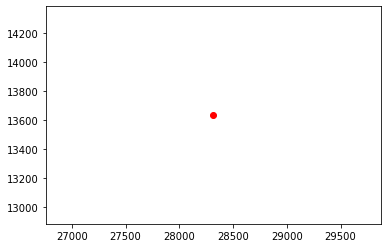

In [21]:
# plt.plot ( pixel_x, pixel_y, 'ro')

In [22]:
# xMax= round(pixel_x+10)
# ymax = round(pixel_y+10)
# x_min = round(pixel_x-10)
# y_min = round(pixel_y -10)

# subset = dsarray[y_min:ymax, x_min:xMax]
print(chm.shape)

(100, 160)


In [23]:
chm

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  1.6800003, ...,  0.       ,  0.       ,
         0.9300003],
       [ 0.       ,  0.       ,  0.       , ...,  0.539999 ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ..., 13.85     , 13.120001 ,
        12.41     ],
       [ 0.       ,  0.       ,  0.       , ..., 13.92     , 13.18     ,
        12.349998 ],
       [ 0.       ,  0.       ,  0.       , ..., 13.299999 , 13.189999 ,
        12.420002 ]], dtype=float32)

In [24]:
dsm_array.max()

64.47

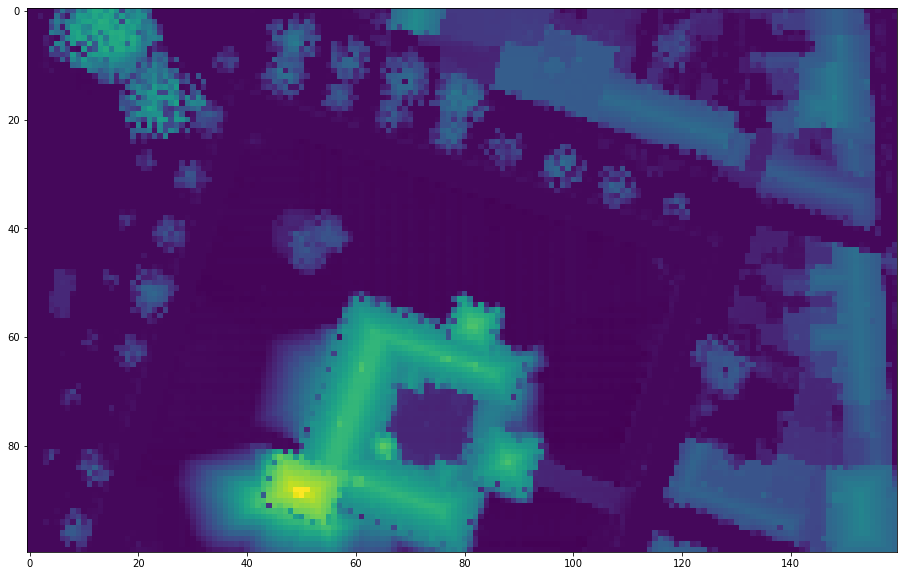

In [25]:
plt.figure(figsize=(20,10))
plt.imshow(chm)

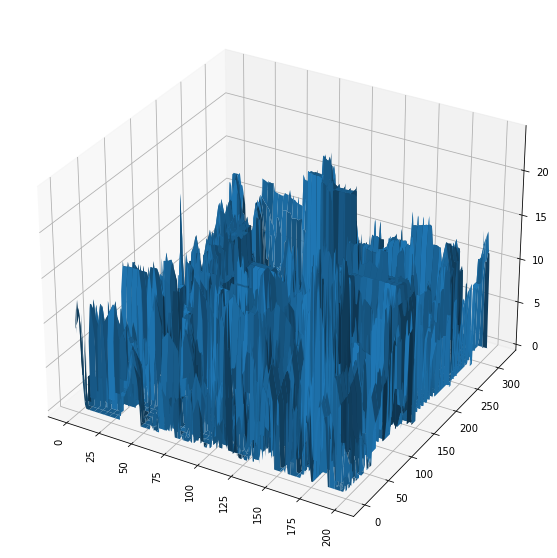

In [119]:
from mpl_toolkits import mplot3d

ny, nx = chm.shape
x = np.arange(0,chm.shape[0])
y = np.arange(0,chm.shape[1])
xv, yv = np.meshgrid(x, y)
z = chm[xv,yv]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
plt.xticks(rotation=90)
dem3d=ax.plot_surface(xv,yv,z)
plt.show()

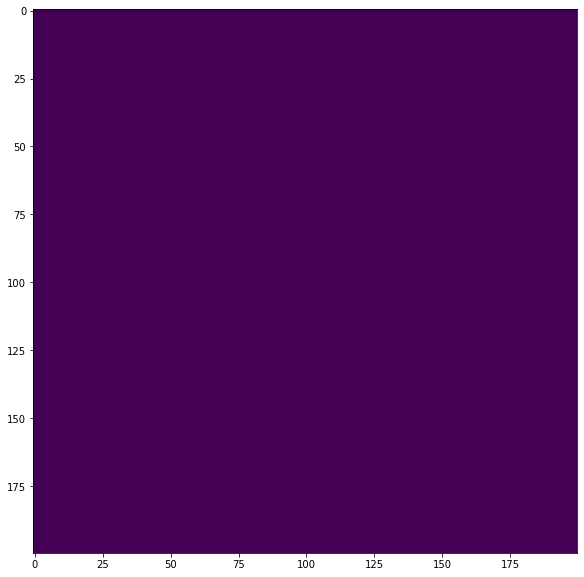

In [76]:
plt.figure(figsize=(20,10))
plt.imshow(dsm_array)